Refer the folder structure containing image data for two classes, **Cars** and **Bikes**, and are required to refer to this structure before beginning the implementation. The task involves loading all RGB images from both folders, resizing them to a fixed size, normalizing pixel values, and converting each image into a suitable input format for a deep neural network. Appropriate class labels must be assigned, and the combined dataset should be shuffled and split into training and testing sets in an 80:20 ratio. A deep neural network model must then be designed by specifying the input layer, one or more hidden layers with appropriate activation functions, and an output layer for binary classification. The model should be trained using forward propagation, backpropagation, and an optimization algorithm such as gradient descent or its variants, while monitoring the training loss. After training for a fixed number of epochs, predictions must be generated for both training and testing data to compute accuracy. Finally, the loss versus epochs graph should be plotted and the training and testing accuracy reported.


In [6]:
import os

print(os.listdir("dataset"))          
print(os.listdir("dataset/cars"))     
print(os.listdir("dataset/bike"))    


['bike', 'cars']
['.ipynb_checkpoints', 'carsgraz_001.bmp', 'carsgraz_002.bmp', 'carsgraz_003.bmp', 'carsgraz_004.bmp', 'carsgraz_005.bmp', 'carsgraz_006.bmp', 'carsgraz_007.bmp', 'carsgraz_008.bmp', 'carsgraz_009.bmp', 'carsgraz_010.bmp', 'carsgraz_011.bmp', 'carsgraz_012.bmp', 'carsgraz_013.bmp', 'carsgraz_014.bmp', 'carsgraz_015.bmp', 'carsgraz_016.bmp', 'carsgraz_017.bmp', 'carsgraz_018.bmp', 'carsgraz_019.bmp', 'carsgraz_020.bmp', 'carsgraz_021.bmp', 'carsgraz_022.bmp', 'carsgraz_023.bmp', 'carsgraz_024.bmp', 'carsgraz_025.bmp', 'carsgraz_026.bmp', 'carsgraz_027.bmp', 'carsgraz_028.bmp', 'carsgraz_029.bmp', 'carsgraz_030.bmp', 'carsgraz_031.bmp', 'carsgraz_032.bmp', 'carsgraz_033.bmp', 'carsgraz_034.bmp', 'carsgraz_035.bmp', 'carsgraz_036.bmp', 'carsgraz_037.bmp', 'carsgraz_038.bmp', 'carsgraz_039.bmp', 'carsgraz_040.bmp', 'carsgraz_041.bmp', 'carsgraz_042.bmp', 'carsgraz_043.bmp', 'carsgraz_044.bmp', 'carsgraz_045.bmp', 'carsgraz_046.bmp', 'carsgraz_047.bmp', 'carsgraz_048.bmp', 

In [9]:
import glob

car_files = glob.glob("dataset/cars/*.bmp")
bike_files = glob.glob("dataset/bike/*.bmp")

print("Cars found:", len(car_files))
print("Bikes found:", len(bike_files))
print("Sample car files:", car_files[:5])
print("Sample bike files:", bike_files[:5])

Cars found: 420
Bikes found: 364
Sample car files: ['dataset/cars\\carsgraz_001.bmp', 'dataset/cars\\carsgraz_002.bmp', 'dataset/cars\\carsgraz_003.bmp', 'dataset/cars\\carsgraz_004.bmp', 'dataset/cars\\carsgraz_005.bmp']
Sample bike files: ['dataset/bike\\bike_001.bmp', 'dataset/bike\\bike_002.bmp', 'dataset/bike\\bike_003.bmp', 'dataset/bike\\bike_004.bmp', 'dataset/bike\\bike_005.bmp']


In [10]:
from tensorflow.keras.preprocessing.image import load_img, img_to_array
import numpy as np

img_size = (128, 128)
X, y = [], []

for file in car_files:
    img = load_img(file, target_size=img_size)
    X.append(img_to_array(img) / 255.0)
    y.append(0)

for file in bike_files:
    img = load_img(file, target_size=img_size)
    X.append(img_to_array(img) / 255.0)
    y.append(1)

X = np.array(X)
y = np.array(y)

print("Total samples loaded:", len(X))

Total samples loaded: 784


In [11]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, shuffle=True, random_state=42
)

In [12]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Flatten, Dense, Dropout

model = Sequential([
    Input(shape=(128, 128, 3)),  
    Flatten(),                    
    Dense(256, activation='relu'), 
    Dense(128, activation='relu'), 
    Dropout(0.5),                  
    Dense(1, activation='sigmoid') 
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [13]:
history = model.fit(
    X_train, y_train,
    epochs=20,
    batch_size=32,
    validation_data=(X_test, y_test)
)

Epoch 1/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 5s 110ms/step - accuracy: 0.5088 - loss: 7.3787 - val_accuracy: 0.5414 - val_loss: 3.1964
Epoch 2/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 2s 82ms/step - accuracy: 0.5470 - loss: 2.7763 - val_accuracy: 0.5414 - val_loss: 0.9878
Epoch 3/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 2s 84ms/step - accuracy: 0.5104 - loss: 1.0593 - val_accuracy: 0.6242 - val_loss: 0.6489
Epoch 4/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 2s 83ms/step - accuracy: 0.5439 - loss: 0.7173 - val_accuracy: 0.6051 - val_loss: 0.6467
Epoch 5/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 2s 83ms/step - accuracy: 0.5869 - loss: 0.6638 - val_accuracy: 0.6115 - val_loss: 0.6293
Epoch 6/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 2s 88ms/step - accuracy: 0.6029 - loss: 0.6520 - val_accuracy: 0.5796 - val_loss: 0.6586
Epoch 7/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 2s 87ms/step - accuracy: 0.6268 - loss: 0.6427 - val_accuracy: 0.5924 - val_loss: 0.6400
Epoch 8/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 2s 85ms/step - accuracy: 0.6396 - loss: 0.6237 - val_accuracy: 0.6051 - 

In [14]:
train_loss, train_acc = model.evaluate(X_train, y_train, verbose=0)
test_loss, test_acc = model.evaluate(X_test, y_test, verbose=0)

print(f"Training Accuracy: {train_acc:.4f}")
print(f"Testing Accuracy: {test_acc:.4f}")

Training Accuracy: 0.7432
Testing Accuracy: 0.6369


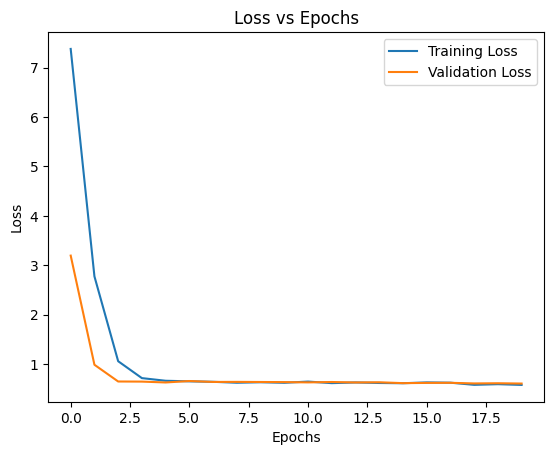

In [15]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss vs Epochs')
plt.legend()
plt.show()